In [2]:
# Importing Libraries
import pandas as pd
import numpy as np
import os
import glob
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load and Merge the datasets

In [3]:
folder_path = "/content/"
csv_files = glob.glob(os.path.join(folder_path, "*.csv"))
# Read and merge all CSVs
dfs = []
for file in csv_files:
    df = pd.read_csv(file)
    dfs.append(df)
# Merge into one main dataframe
data = pd.concat(dfs, ignore_index=True)
# Show first few rows
print("Merged dataset shape:", data.shape)
data.head()

Merged dataset shape: (385704, 18)


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,3.0,8.0,300.0,44.0,-0.9,1025.8,-20.5,0.0,NW,9.3,Shunyi
1,2,2013,3,1,1,12.0,12.0,3.0,7.0,300.0,47.0,-1.1,1026.1,-21.3,0.0,NW,9.4,Shunyi
2,3,2013,3,1,2,14.0,14.0,NaN,7.0,200.0,22.0,-1.7,1026.2,-23.0,0.0,NW,8.6,Shunyi
3,4,2013,3,1,3,12.0,12.0,3.0,5.0,NaN,NaN,-2.1,1027.3,-23.3,0.0,NW,6.6,Shunyi
4,5,2013,3,1,4,12.0,12.0,3.0,NaN,200.0,11.0,-2.4,1027.7,-22.9,0.0,NW,4.5,Shunyi


# Task 2 exploratory data analysis

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 385704 entries, 0 to 385703
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       385704 non-null  int64  
 1   year     385704 non-null  int64  
 2   month    385704 non-null  int64  
 3   day      385704 non-null  int64  
 4   hour     385704 non-null  int64  
 5   PM2.5    377661 non-null  float64
 6   PM10     379739 non-null  float64
 7   SO2      377352 non-null  float64
 8   NO2      374342 non-null  float64
 9   CO       366300 non-null  float64
 10  O3       373505 non-null  float64
 11  TEMP     385325 non-null  float64
 12  PRES     385330 non-null  float64
 13  DEWP     385320 non-null  float64
 14  RAIN     385333 non-null  float64
 15  wd       383961 non-null  object 
 16  WSPM     385399 non-null  float64
 17  station  385704 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 53.0+ MB


In [6]:
data.columns

Index(['No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2',
       'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station'],
      dtype='object')

In [7]:
data.isnull().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,8043
PM10,5965
SO2,8352
NO2,11362
CO,19404


In [8]:
print("\nData Types:")
data.dtypes


Data Types:


,0
No,int64
year,int64
month,int64
day,int64
hour,int64
PM2.5,float64
PM10,float64
SO2,float64
NO2,float64
CO,float64


In [9]:
print("\nStatistical Summary:")
data.describe()


Statistical Summary:


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,385704.000000,385704.000000,385704.000000,385704.000000,385704.000000,377661.000000,379739.000000,377352.000000,374342.000000,366300.000000,373505.000000,385325.000000,385330.000000,385320.000000,385333.000000,385399.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.317422,103.908644,15.710722,50.190307,1217.894933,57.476218,13.516648,1010.677423,2.471120,0.064490,1.728291
std,10122.118037,1.177198,3.448708,8.800103,6.922196,80.320205,91.192425,21.425689,35.030817,1153.357398,56.622068,11.440518,10.462440,13.801826,0.823155,1.249955
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,20.000000,36.000000,3.000000,23.000000,500.000000,11.000000,3.100000,1002.200000,-9.000000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,81.000000,7.000000,43.000000,900.000000,45.000000,14.500000,1010.300000,3.000000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,110.000000,145.000000,19.000000,71.000000,1500.000000,82.000000,23.200000,1019.000000,15.100000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,957.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,12.900000


## Data preprocessing

In [10]:
# Handling Missing Values
# Fill missing numeric values with median
numeric_cols = data.select_dtypes(include=np.number).columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].median())
# Fill missing wind directions with the most common value
data['wd'] = data['wd'].fillna(data['wd'].mode()[0])
data.isnull().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,0
PM10,0
SO2,0
NO2,0
CO,0


In [11]:
# Remove Duplicate Rows
data = data.drop_duplicates()

In [12]:
# Feature Engineering
# Create a "datetime" feature
data['datetime'] = pd.to_datetime(data[['year', 'month', 'day', 'hour']])
# Sort by datetime
data = data.sort_values('datetime')

In [14]:
# Univariate Analysis: PM2.5 Distribution

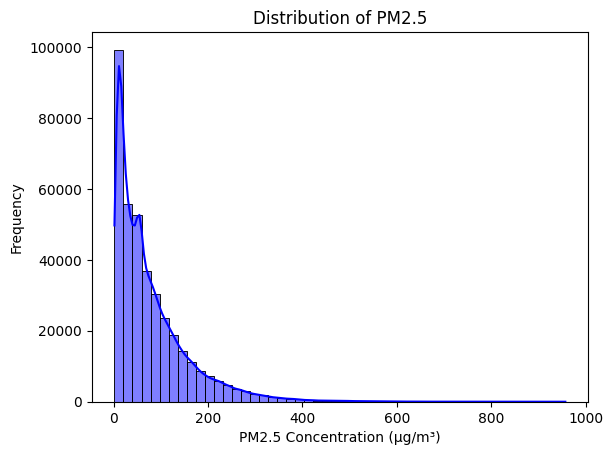

In [13]:
sns.histplot(data['PM2.5'], bins=50, kde=True, color='blue')
plt.title("Distribution of PM2.5")
plt.xlabel("PM2.5 Concentration (µg/m³)")
plt.ylabel("Frequency")
plt.show()

In [17]:
# Time Series Line Plot: PM2.5 Over Time

<ipython-input-15-00d54497b27c>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data.set_index('datetime')['PM2.5'].resample('M').mean().plot(figsize=(14,5))


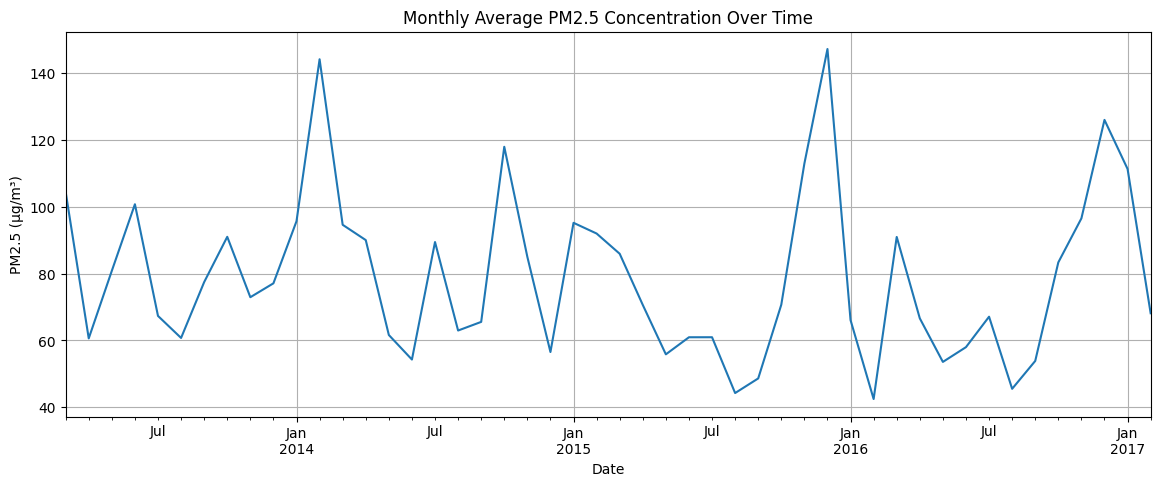

In [15]:
data.set_index('datetime')['PM2.5'].resample('M').mean().plot(figsize=(14,5))
plt.title("Monthly Average PM2.5 Concentration Over Time")
plt.ylabel("PM2.5 (µg/m³)")
plt.xlabel("Date")
plt.grid()
plt.show()

In [16]:
# Bivariate Analysis: PM2.5 vs Temperature

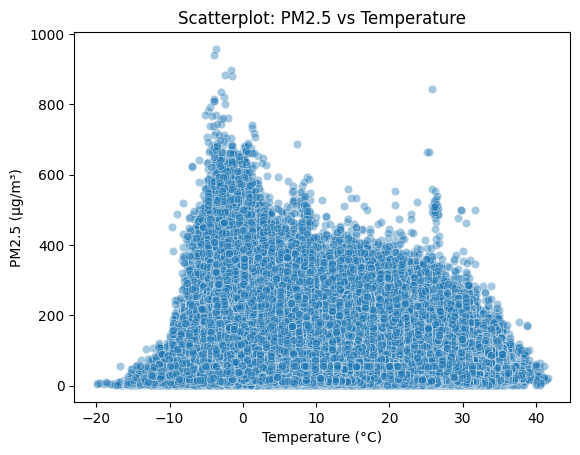

In [17]:
sns.scatterplot(x='TEMP', y='PM2.5', data=data, alpha=0.4)
plt.title("Scatterplot: PM2.5 vs Temperature")
plt.xlabel("Temperature (°C)")
plt.ylabel("PM2.5 (µg/m³)")
plt.show()

In [18]:
# Boxplot: PM2.5 by Wind Direction

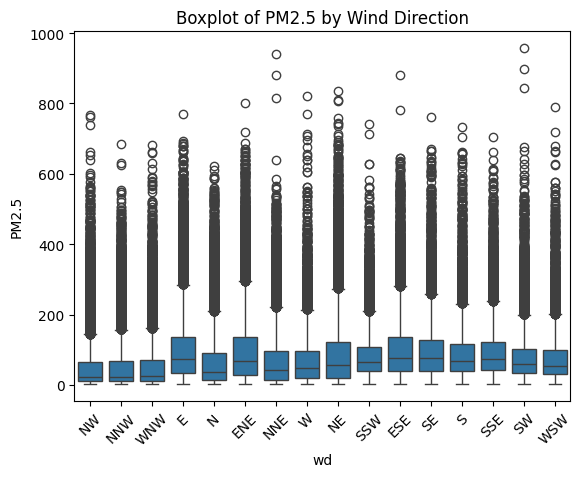

In [19]:
sns.boxplot(x='wd', y='PM2.5', data=data)
plt.title("Boxplot of PM2.5 by Wind Direction")
plt.xticks(rotation=45)
plt.show()

In [20]:
# Heatmap: Correlation Matrix

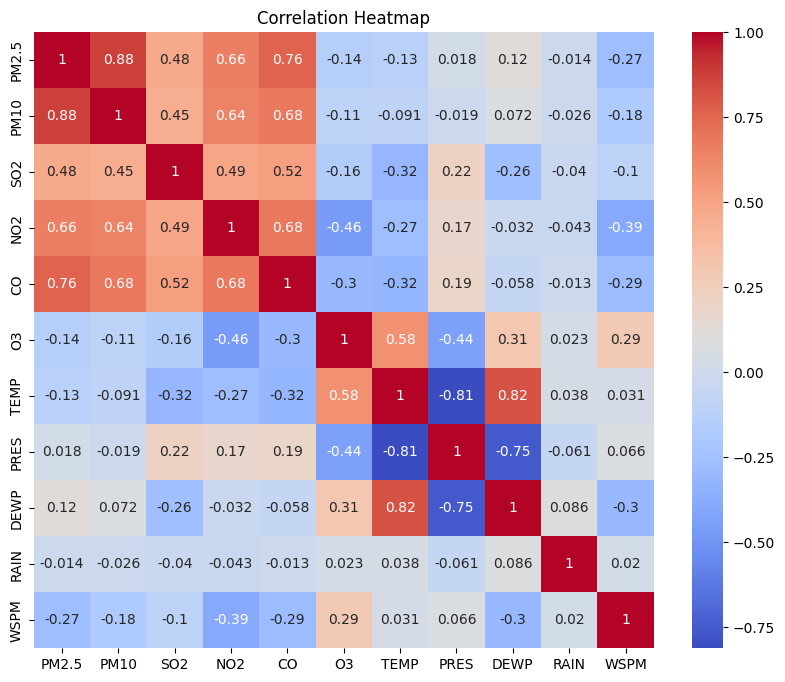

In [21]:
plt.figure(figsize=(10, 8))
corr = data[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [22]:
# Bar Chart: Average PM2.5 by Month

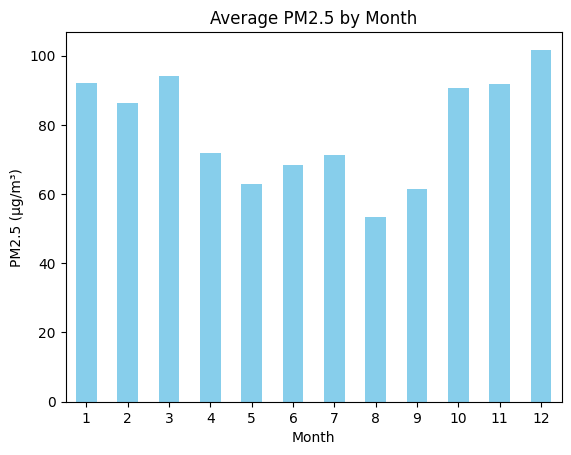

In [23]:
monthly_avg = data.groupby(data['datetime'].dt.month)['PM2.5'].mean()
monthly_avg.plot(kind='bar', color='skyblue')
plt.title("Average PM2.5 by Month")
plt.xlabel("Month")
plt.ylabel("PM2.5 (µg/m³)")
plt.xticks(rotation=0)
plt.show()

In [24]:
# Multivariate Analysis: Pairplot of Pollutants

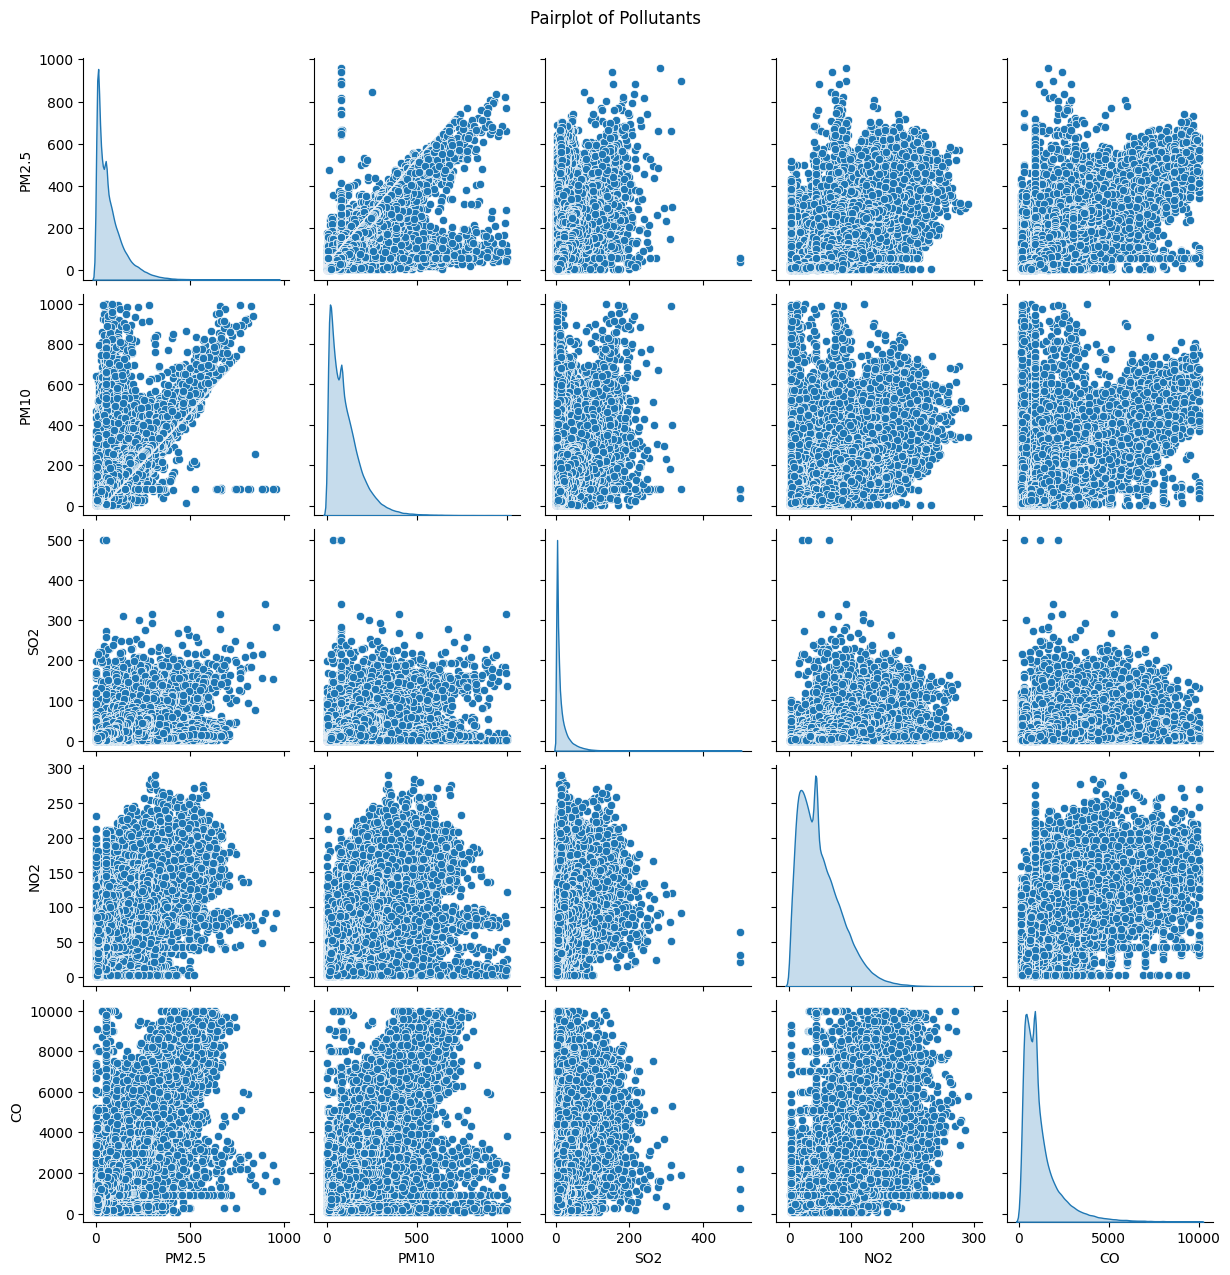

In [25]:
sns.pairplot(data[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO']].dropna(), diag_kind='kde')
plt.suptitle("Pairplot of Pollutants", y=1.02)
plt.show()

In [26]:
# Wind Speed vs PM2.5: Scatter Plot with Regression Line

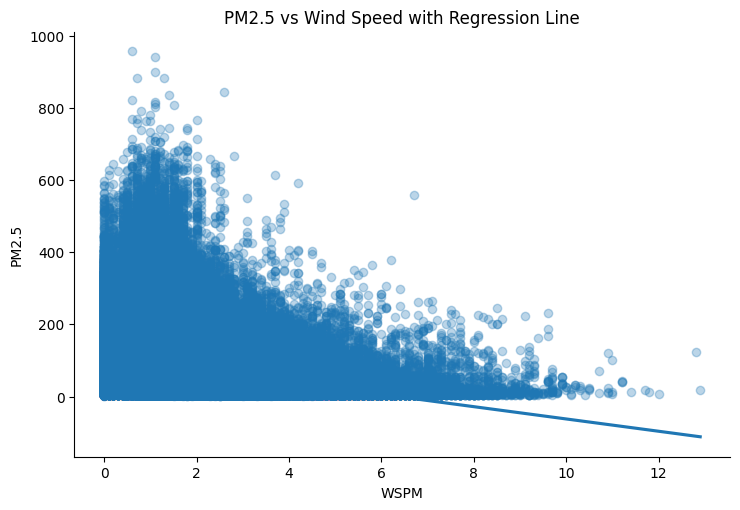

In [27]:
sns.lmplot(x='WSPM', y='PM2.5', data=data, aspect=1.5, scatter_kws={'alpha':0.3})
plt.title("PM2.5 vs Wind Speed with Regression Line")
plt.show()

## Statistical summary

In [28]:
# Select numerical columns for summary
numerical_cols = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']
# Create a dictionary of statistics
summary_stats = {
    'Mean': data[numerical_cols].mean(),
    'Median': data[numerical_cols].median(),
    'Min': data[numerical_cols].min(),
    'Max': data[numerical_cols].max(),
    'Std Dev': data[numerical_cols].std(),
    'Skewness': data[numerical_cols].skew(),
    'Kurtosis': data[numerical_cols].kurt()
}
# Convert to DataFrame
import pandas as pd
custom_summary = pd.DataFrame(summary_stats)
custom_summary = custom_summary.transpose()
# Display nicely
print("Custom Statistical Summary:\n")
display(custom_summary.round(2))

Custom Statistical Summary:



,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
Mean,78.81,103.55,15.52,49.98,1201.90,57.08,13.52,1010.68,2.47,0.06,1.73
Median,55.00,81.00,7.00,43.00,900.00,45.00,14.50,1010.30,3.00,0.00,1.40
Min,2.00,2.00,0.29,1.03,100.00,0.21,-19.90,982.40,-43.40,0.00,0.00
Max,957.00,999.00,500.00,290.00,10000.00,1071.00,41.60,1042.80,29.10,72.50,12.90
Std Dev,79.55,90.53,21.23,34.53,1126.12,55.76,11.43,10.46,13.79,0.82,1.25
Skewness,2.04,1.91,3.05,1.09,2.68,1.73,-0.10,0.10,-0.19,30.34,1.63
Kurtosis,6.06,6.36,14.60,1.38,10.20,7.01,-1.14,-0.82,-1.13,1377.82,3.72


# Task 3 Model building

In [29]:
# Feature Setup

In [30]:
# Drop rows with missing values in selected features
selected_features = ['TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM',
                     'PM10', 'SO2', 'NO2', 'CO', 'O3', 'wd']
data_filtered = data[selected_features + ['PM2.5']].dropna()
X = data_filtered.drop(columns=['PM2.5'])
y = data_filtered['PM2.5']

In [31]:
# Column types
numeric_features = ['TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM', 'PM10', 'SO2', 'NO2', 'CO', 'O3']
categorical_features = ['wd']
# Preprocessor
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

# Linear Regression

In [32]:
pipeline_lr = Pipeline([
    ('preprocess', preprocessor),
    ('model', LinearRegression())
])
pipeline_lr.fit(X, y)
y_pred_lr = pipeline_lr.predict(X)
print("Linear Regression:")
print("RMSE:", np.sqrt(mean_squared_error(y, y_pred_lr)))
print("MAE:", mean_absolute_error(y, y_pred_lr))
print("R² Score:", r2_score(y, y_pred_lr))

Linear Regression:
RMSE: 31.694531237849517
MAE: 20.43760556397221
R² Score: 0.841275895987526


# Random Forest Regressor

In [33]:
pipeline_rf = Pipeline([
    ('preprocess', preprocessor),
    ('model', RandomForestRegressor(n_estimators=100, random_state=42))
])
pipeline_rf.fit(X, y)
y_pred_rf = pipeline_rf.predict(X)
print("Random Forest Regressor:")
print("RMSE:", np.sqrt(mean_squared_error(y, y_pred_rf)))
print("MAE:", mean_absolute_error(y, y_pred_rf))
print("R² Score:", r2_score(y, y_pred_rf))

Random Forest Regressor:
RMSE: 7.505120560207282
MAE: 4.441202391076107
R² Score: 0.9911000090638311


# Task 4 Application development

In [42]:
import gradio as gr
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np
import os, glob
#  Load & Preprocess Data
folder_path = "/content/"  # Change if needed
csv_files = glob.glob(os.path.join(folder_path, "*.csv"))
dfs = [pd.read_csv(file) for file in csv_files]
data = pd.concat(dfs, ignore_index=True)
data['wd'] = data['wd'].fillna(data['wd'].mode()[0])
numeric_cols = data.select_dtypes(include=np.number).columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].median())
data = data.drop_duplicates()
data['datetime'] = pd.to_datetime(data[['year', 'month', 'day', 'hour']])
data = data.sort_values('datetime')

features = ['TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'wd']
target = 'PM2.5'
X = data[features].dropna()
y = data[target].loc[X.index]

numeric = X.select_dtypes(include='number').columns.tolist()
categorical = ['wd']
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric),
    ('cat', OneHotEncoder(), categorical)
])

# Train models (Linear Regression and Random Forest only)
def get_model(model_type):
    if model_type == "Linear Regression":
        model = LinearRegression()
    elif model_type == "Random Forest":
        model = RandomForestRegressor(n_estimators=100)
    else:
        raise ValueError("Unsupported model type. Choose 'Linear Regression' or 'Random Forest'.")

    pipeline = Pipeline([("pre", preprocessor), ("model", model)])
    pipeline.fit(X, y)
    return pipeline

#  GUI Functions
def home_page():
    return """
# Welcome to the PM2.5 Air Quality Analysis App 🌿

Explore and predict PM2.5 air pollution levels using weather and pollutant data.

### Features:
- **Data Overview**: Summary, types, and shape of the dataset.
- **Exploratory Data Analysis**: Visual trends and relationships.
- **Modeling & Prediction**: Predict PM2.5 using machine learning models.

Dataset includes variables like Temperature, Wind Speed, PM10, CO, SO₂, NO₂, O₃, and Wind Direction.

---

### Summary:
Air pollution is comprised of various chemicals and particles present in the atmosphere, which present significant hazards to both public health and the environment (Lim et al., 2020). Prolonged exposure to air pollution elevates the likelihood of experiencing a stroke, cardiovascular disease, lung carcinoma, and a multitude of other chronic pulmonary conditions (Brauer et al., 2021; Li et al., 2019). Consequently, it is of paramount importance and necessity to mitigate air pollution through the forecasting of air quality.

Beijing, the capital of China, has encountered some problems related to pollution control in the process of rapid economic development. The effect of air quality improvement in recent years has been relatively good in China, but the situation is still very serious (Li et al., 2024). Air pollution is still a great challenge to mankind all over the world (Sokhi et al., 2022).

---

### Dataset Information:
The dataset includes hourly air pollutants data from 12 nationally controlled air-quality monitoring sites: Gucheng, Wanshouxigong, Tiantan, Guanyuan, Dongsi, Nongzhanguan, Wanliu, Aotizhongxin, Shunyi, Changping, Dingling, and Huairou. The dataset includes two main categories:

1. **Air-quality pollutants** of 12 stations, including solid particulate matter (PM2.5, PM10) and gas pollutants (SO2, NO2, CO, O3).
2. **Meteorological conditions** including wind speed (Wspd), rainfall (Rain), temperature (Temp), dew point (Dewp), and pressure (Pre).

The air-quality data is sourced from the Beijing Municipal Environmental Monitoring Center, and the meteorological data is matched with the nearest weather stations from the China Meteorological Administration. The dataset spans the period from March 1st, 2013, to February 28th, 2017.
"""


def show_overview(option):
    if option == "Head":
        return data.head().to_markdown()
    elif option == "Shape":
        return f"Rows: {data.shape[0]}, Columns: {data.shape[1]}"
    elif option == "Data Types":
        return data.dtypes.to_string()
    elif option == "Summary":
        return data.describe().to_string()

def show_eda(plot_type):
    plt.clf()
    if plot_type == "PM2.5 Distribution":
        sns.histplot(data['PM2.5'], bins=50, kde=True, color='blue')
        plt.title("Distribution of PM2.5")
        plt.xlabel("PM2.5 Concentration (µg/m³)")
        plt.ylabel("Frequency")
    elif plot_type == "Monthly Trend":
        data.set_index('datetime')['PM2.5'].resample('M').mean().plot(figsize=(10,4))
        plt.title("Monthly Average PM2.5 Concentration Over Time")
        plt.ylabel("PM2.5 (µg/m³)")
        plt.xlabel("Date")
        plt.grid()
    elif plot_type == "PM2.5 vs Temperature":
        sns.scatterplot(x='TEMP', y='PM2.5', data=data, alpha=0.4)
        plt.title("Scatterplot: PM2.5 vs Temperature")
        plt.xlabel("Temperature (°C)")
        plt.ylabel("PM2.5 (µg/m³)")
    elif plot_type == "Boxplot by Wind Direction":
        sns.boxplot(x='wd', y='PM2.5', data=data)
        plt.title("Boxplot of PM2.5 by Wind Direction")
        plt.xticks(rotation=45)
    elif plot_type == "Correlation Heatmap":
        plt.figure(figsize=(10, 8))
        corr = data[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']].corr()
        sns.heatmap(corr, annot=True, cmap='coolwarm')
        plt.title("Correlation Heatmap")
    elif plot_type == "Average PM2.5 by Month":
        monthly_avg = data.groupby(data['datetime'].dt.month)['PM2.5'].mean()
        monthly_avg.plot(kind='bar', color='skyblue')
        plt.title("Average PM2.5 by Month")
        plt.xlabel("Month")
        plt.ylabel("PM2.5 (µg/m³)")
        plt.xticks(rotation=0)
    elif plot_type == "Pairplot of Pollutants":
        sns.pairplot(data[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO']].dropna(), diag_kind='kde')
        plt.suptitle("Pairplot of Pollutants", y=1.02)
        return plt.gcf()
    elif plot_type == "WSPM vs PM2.5 Regression":
        sns.lmplot(x='WSPM', y='PM2.5', data=data, aspect=1.5, scatter_kws={'alpha':0.3})
        plt.title("PM2.5 vs Wind Speed with Regression Line")
        return plt.gcf()
    return plt.gcf()

def predict(model_name, temp, pres, dewp, rain, wspm, pm10, so2, no2, co, o3, wd):
    df = pd.DataFrame([[temp, pres, dewp, rain, wspm, pm10, so2, no2, co, o3, wd]], columns=features)
    model = {"Linear Regression": lr_model, "Random Forest": rf_model}[model_name]
    pred = model.predict(df)[0]
    return f"Predicted PM2.5: {pred:.2f} µg/m³"

#  Gradio Interface
with gr.Blocks(title="PM2.5 Analysis App") as app:
    with gr.Tab("🏠 Home"):
        gr.Markdown(home_page())

    with gr.Tab("📊 Data Overview"):
        gr.Markdown("### View Dataset Information")
        overview_option = gr.Radio(["Head", "Shape", "Data Types", "Summary"], label="Select Info Type")
        overview_output = gr.Textbox(label="Result", lines=15)
        overview_option.change(fn=show_overview, inputs=overview_option, outputs=overview_output)

    with gr.Tab("📈 EDA"):
        gr.Markdown("### Exploratory Data Analysis")
        eda_options = [
            "PM2.5 Distribution", "Monthly Trend", "PM2.5 vs Temperature",
            "Boxplot by Wind Direction", "Correlation Heatmap",
            "Average PM2.5 by Month", "Pairplot of Pollutants",
            "WSPM vs PM2.5 Regression"
        ]
        eda_select = gr.Radio(eda_options, label="Choose Plot Type")
        eda_plot = gr.Plot()
        eda_select.change(fn=show_eda, inputs=eda_select, outputs=eda_plot)

    with gr.Tab("🧠 Modeling & Prediction"):
        gr.Markdown("### Predict PM2.5 Concentration")
        model_choice = gr.Dropdown(["Linear Regression", "Random Forest"], label="Choose Model")
        with gr.Row():
            temp = gr.Number(label="Temperature (TEMP)")
            pres = gr.Number(label="Pressure (PRES)")
            dewp = gr.Number(label="Dew Point (DEWP)")
            rain = gr.Number(label="Rain (RAIN)")
            wspm = gr.Number(label="Wind Speed (WSPM)")
        with gr.Row():
            pm10 = gr.Number(label="PM10")
            so2 = gr.Number(label="SO2")
            no2 = gr.Number(label="NO2")
            co = gr.Number(label="CO")
            o3 = gr.Number(label="O3")
            wd = gr.Textbox(label="Wind Direction (wd)", placeholder="e.g. NW")

        predict_btn = gr.Button("Predict")
        pred_output = gr.Textbox(label="Prediction Result")
        predict_btn.click(fn=predict, inputs=[model_choice, temp, pres, dewp, rain, wspm, pm10, so2, no2, co, o3, wd], outputs=pred_output)

app.launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://394ebc76a2e2efd6de.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
